In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Import OpenWeatherMap for ease of data retrieval
import openweathermapy.core as owm

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [12]:
#Generate Cities list

# List for holding lat_lon and cities

lat_lngs = []
cities = []

# Create a set of random lat and lng combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat_lon combination

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

In [13]:
base_url = "https://api.openweathermap.org/data/2.5/weather?"

# creating data frame emptry strings to use in for loop
owm_data = pd.DataFrame()
owm_data["City"] = ""
owm_data["Cloudy"] = ""
owm_data["Country"] = ""
owm_data["Date"] = "" 
owm_data["Humidity"] = ""
owm_data["Latitude"] = ""
owm_data["Longitude"] = ""
owm_data["Max Temp"] = ""
owm_data["Wind Speed"] = ""

# Print out the beginning of the retrieval notificaiton
print("Beginning Weather Data Retrieval")
print("-------------------------------")

# Loop through all of the cities within the cities array

for x in np.arange(len(cities)):
    
    print(f"Processing record {x}|{cities[x]}")
    try:
     # Request the current weather from url of the current city via json
        current_weather_response = requests.get(f"{base_url}&appid={api_key}&q={cities[x]}&units=imperial").json()
# Place all of the variables into the created dataframe
        owm_data.loc[x, "City"] = current_weather_response["name"]
        owm_data.loc[x, "Cloudy"] = current_weather_response["clouds"]["all"]            
        owm_data.loc[x, "Country"] = current_weather_response["sys"]["country"]
        owm_data.loc[x, "Date"] = current_weather_response["dt"]
        owm_data.loc[x, "Humidity"] = current_weather_response["main"]["humidity"]
        owm_data.loc[x, "Latitude"] = current_weather_response["coord"]["lat"]
        owm_data.loc[x, "Longitude"] = current_weather_response["coord"]["lon"]
        owm_data.loc[x, "Max Temp"] = current_weather_response["main"]["temp_max"]
        owm_data.loc[x, "Wind Speed"] = current_weather_response["wind"]["speed"]
        
        # per OpenWeatherMap documentation, there is a limit of 60, so added a stall of 1 second
        #to not exceed the rate limit
        time.sleep(1.00)
               
    except(KeyError, IndexError):
        print("Unable to locate city. Moving to the next city")


print("Weather Data Retrieval Complete")

Beginning Weather Data Retrieval
-------------------------------
Processing record 0|new norfolk
Processing record 1|mugur-aksy
Processing record 2|belushya guba
Unable to locate city. Moving to the next city
Processing record 3|tuktoyaktuk
Processing record 4|atuona
Processing record 5|ribeira grande
Processing record 6|albany
Processing record 7|naze
Processing record 8|shalakusha
Processing record 9|cape town
Processing record 10|butaritari
Processing record 11|yellowknife
Processing record 12|puerto ayora
Processing record 13|grand gaube
Processing record 14|shelburne
Processing record 15|vaitupu
Unable to locate city. Moving to the next city
Processing record 16|dzhebariki-khaya
Processing record 17|camacha
Processing record 18|floro
Processing record 19|tasiilaq
Processing record 20|makat
Processing record 21|punta arenas
Processing record 22|kodiak
Processing record 23|goundi
Processing record 24|tsihombe
Unable to locate city. Moving to the next city
Processing record 25|saleau

Processing record 221|broome
Processing record 222|hihifo
Unable to locate city. Moving to the next city
Processing record 223|amderma
Unable to locate city. Moving to the next city
Processing record 224|tazovskiy
Processing record 225|eskisehir
Processing record 226|kulaman
Processing record 227|tabou
Processing record 228|saint-pierre
Processing record 229|lorengau
Processing record 230|kalmunai
Processing record 231|newcastle
Processing record 232|luderitz
Processing record 233|sibolga
Processing record 234|scranton
Processing record 235|yomitan
Unable to locate city. Moving to the next city
Processing record 236|geraldton
Processing record 237|buenos aires
Processing record 238|tete
Processing record 239|kavaratti
Processing record 240|scarborough
Processing record 241|rungata
Unable to locate city. Moving to the next city
Processing record 242|homestead
Processing record 243|aliwal north
Processing record 244|araguaina
Processing record 245|nemuro
Processing record 246|longyearbye

Processing record 445|ulladulla
Processing record 446|mpraeso
Processing record 447|hay river
Processing record 448|port hardy
Processing record 449|taoudenni
Processing record 450|conceicao da barra
Processing record 451|necochea
Processing record 452|korla
Unable to locate city. Moving to the next city
Processing record 453|port-gentil
Processing record 454|pacifica
Processing record 455|san cristobal
Processing record 456|ugoofaaru
Processing record 457|caravelas
Processing record 458|raudeberg
Processing record 459|akola
Processing record 460|the pas
Processing record 461|ust-ishim
Processing record 462|warqla
Unable to locate city. Moving to the next city
Processing record 463|aklavik
Processing record 464|ekimchan
Processing record 465|sakakah
Unable to locate city. Moving to the next city
Processing record 466|mitsamiouli
Processing record 467|taburi
Unable to locate city. Moving to the next city
Processing record 468|grand river south east
Unable to locate city. Moving to the n

In [27]:
#Remove the rows with no data detected that say skipping to next city 
# to create new refined data frame: owm_city_data_df
owm_city_data_df = owm_data.dropna()

In [28]:
# Counts of each column
owm_city_data_df.count()

City          531
Cloudy        531
Country       531
Date          531
Humidity      531
Latitude      531
Longitude     531
Max Temp      531
Wind Speed    531
dtype: int64

##### Save to csv file
- output_data_file = "output_data/cities.csv"
- Display data frame for preview

In [19]:
owm_city_data_df.to_csv("output_data/cities.csv")
owm_city_data_df.head(10)

,City,Cloudy,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,New Norfolk,1,AU,1567710177,93,-42.78,147.06,45,6.93
1,Mugur-Aksy,60,RU,1567710179,95,50.38,90.44,28.58,1.41
3,Tuktoyaktuk,20,CA,1567710181,87,69.44,-133.03,46.4,3.36
4,Atuona,1,PF,1567710182,75,-9.8,-139.03,78.62,11.34
5,Ribeira Grande,40,PT,1567709926,73,38.52,-28.7,73.4,10.29
6,Albany,1,US,1567710185,60,42.65,-73.75,72,3.36
7,Naze,100,NG,1567709752,95,5.43,7.07,74.9,4.45
8,Shalakusha,100,RU,1567710188,84,62.23,40.26,52.88,4.59
9,Cape Town,0,ZA,1567709921,67,-33.93,18.42,62.01,9.17
10,Butaritari,96,KI,1567710191,70,3.07,172.79,84.56,9.69


###### Plotting the Data
Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs

## Latitude vs. Temperature Plot

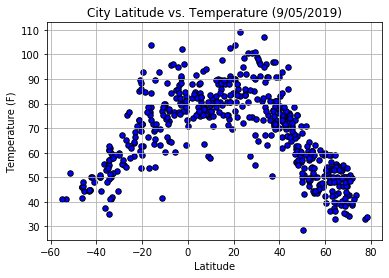

In [21]:
plt.scatter(owm_city_data_df["Latitude"],
            owm_city_data_df["Max Temp"],
            marker="o",
            color="blue",
            s=30,                    
            edgecolors="k",                         
            linewidth=1.0)  
# Scatter plot Labeling
plt.title("City Latitude vs. Temperature (9/05/2019)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()

plt.savefig("output_data/Lat_vs_Temp.png")
plt.show()

### Latitude vs. Humidity Plot

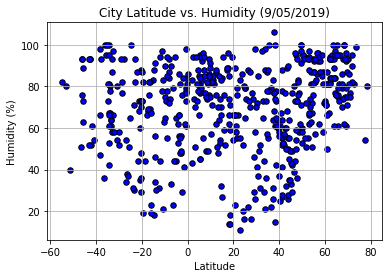

In [22]:
plt.scatter(owm_city_data_df["Latitude"],
            owm_city_data_df["Humidity"],
            marker="o",
            color="blue",
            s=30,                    
            edgecolors="k",                         
            linewidth=1.0)  
# Scatter plot Labeling
plt.title("City Latitude vs. Humidity (9/05/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

plt.savefig("output_data/Lat_vs_Humidity.png")
plt.show()

### Latitude vs. Cloudiness Plot

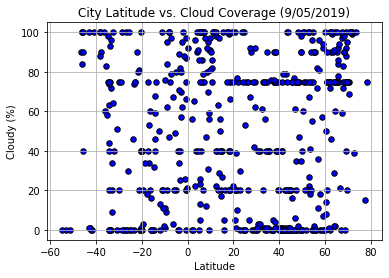

In [23]:
plt.scatter(owm_city_data_df["Latitude"],
            owm_city_data_df["Cloudy"],
            marker="o",
            color="blue",
            s=30,                    
            edgecolors="k",                         
            linewidth=1.0)  
# Scatter plot Labeling
plt.title("City Latitude vs. Cloud Coverage (9/05/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudy (%)")
plt.grid()

plt.savefig("output_data/Lat_vs_cloudy.png")
plt.show()

### Latitude vs. Wind Speed Plot

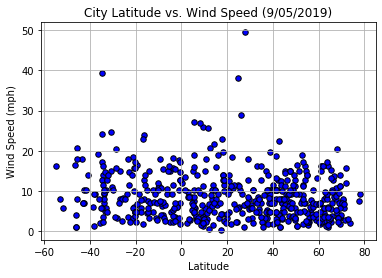

In [26]:
plt.scatter(owm_city_data_df["Latitude"],
            owm_city_data_df["Wind Speed"],
            marker="o",
            color="blue",
            s=30,                    
            edgecolors="k",                         
            linewidth=1.0)  
# Scatter plot Labeling
plt.title("City Latitude vs. Wind Speed (9/05/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.savefig("output_data/Lat_vs_wind_speed.png")
plt.show()